In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head(5)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
dataset.drop(['Id'], axis = 1, inplace = True)

In [5]:
dataset.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   Attrition                1628 non-null   int64 
 2   BusinessTravel           1628 non-null   object
 3   Department               1628 non-null   object
 4   DistanceFromHome         1628 non-null   int64 
 5   Education                1628 non-null   int64 
 6   EducationField           1628 non-null   object
 7   EmployeeNumber           1628 non-null   int64 
 8   EnvironmentSatisfaction  1628 non-null   int64 
 9   Gender                   1628 non-null   object
 10  JobInvolvement           1628 non-null   int64 
 11  JobRole                  1628 non-null   object
 12  JobSatisfaction          1628 non-null   int64 
 13  MaritalStatus            1628 non-null   object
 14  MonthlyIncome            1628 non-null  

In [7]:
dataset.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

A few inferences - 
1. No missing values in the dataset (good news).
2. 7 non-numeric columns, not necessarily only 7 categorical features. 21 numeric columns.
3. 1628 training samples provided.

# Univariate Analysis

## Numerical Data Analysis

In [8]:
numeric_data = dataset.loc[:, dataset.dtypes != object]

In [9]:
def plot_distribution(data, feature, kde = True, with_hue = False):
#     fig, ax = plt.subplots(figsize = (15, 10))
    if with_hue:
        grid = sns.FacetGrid(data, hue = 'Attrition', height = 10, aspect = 1)
    else:
        grid = sns.FacetGrid(data, height = 10, aspect = 1)
    grid = grid.map(sns.distplot, feature, kde = kde)
    if with_hue: plt.legend()

In [10]:
numeric_predictors = list(numeric_data.columns)
# Popping out Attrition - as it is not a predictor, rather the target
_ = numeric_predictors.pop(1)

In [11]:
for predictor in numeric_predictors:
    print('{}: {}'.format(predictor, len(numeric_data[predictor].value_counts())))

Age: 43
DistanceFromHome: 29
Education: 5
EmployeeNumber: 1000
EnvironmentSatisfaction: 4
JobInvolvement: 4
JobSatisfaction: 4
MonthlyIncome: 941
NumCompaniesWorked: 10
PercentSalaryHike: 15
PerformanceRating: 2
StockOptionLevel: 4
TotalWorkingYears: 39
TrainingTimesLastYear: 7
YearsAtCompany: 36
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18
CommunicationSkill: 5
Behaviour: 1


From the above statistics, we can conclude that the features - Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, StockOptionLevel, TrainingTimesLastYear, CommunicationSkill, Behaviour might be ordinal categorical variables. We will se more later on during Univariate Analysis.

Minimum Age: 18, Maximum Age: 60


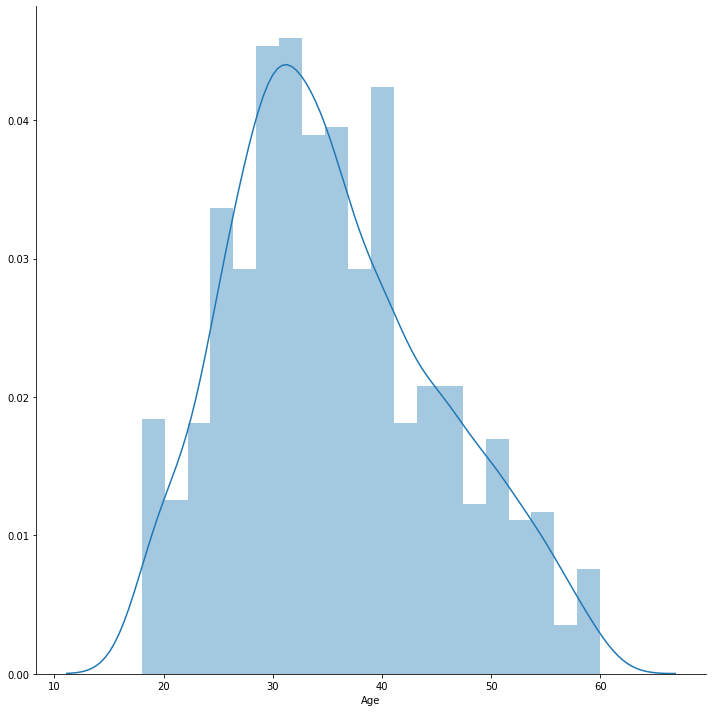

In [12]:
plot_distribution(numeric_data, numeric_predictors[0])
print('Minimum Age: {}, Maximum Age: {}'.format(min(numeric_data['Age']), max(numeric_data['Age'])))

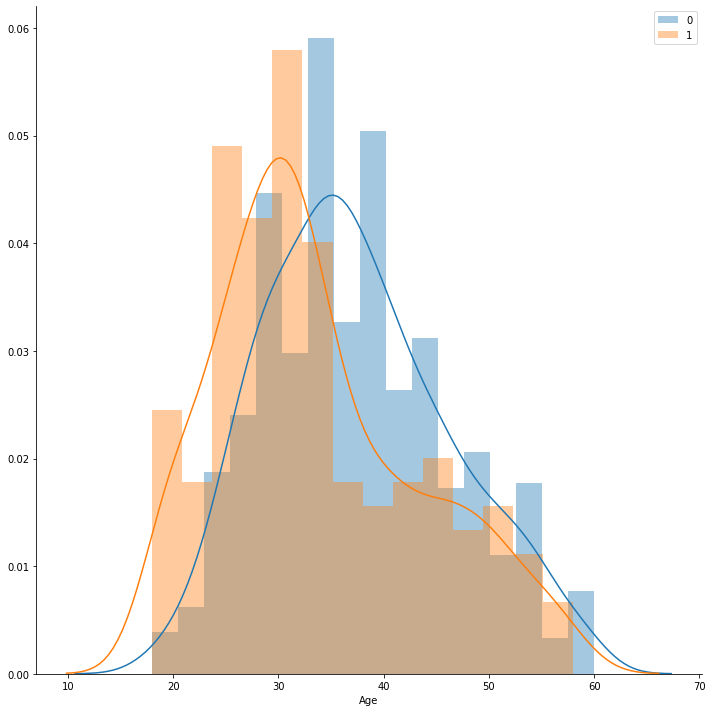

In [13]:
plot_distribution(numeric_data, numeric_predictors[0], with_hue = True)

The age variable ranges from 18 to 60, with a slight right right skewness. The mode is somewhere around 30 - 32 years of age.

On examining it separately for different values of Attrition, it can be seen that Age on itself is not such a huge predictor for Attrition. However, you can notice that for the rough range: 18 - 32, a higher proportion of people show the tendency of leaving the company. And, for the rough range 32 - 45, a higher proportion of people tend to retain the job they have.

This is actually quite natural - the first age group is the one where people tend to switch jobs more often than not, in order to increase the pay as much as they can while gathering the experience they need to get better pay. On the other hand, the second age group is one where people settle down and tend to take less risks with their lives.

Above the age of 45, it can be seen that equal proportion of people belong to both the classes. The attrition might be due to gender (women leaving their job early, just a hunch on day-to-day observations not any stereotype. I will try to justify/nullify the hunch with data), or due to health problems.

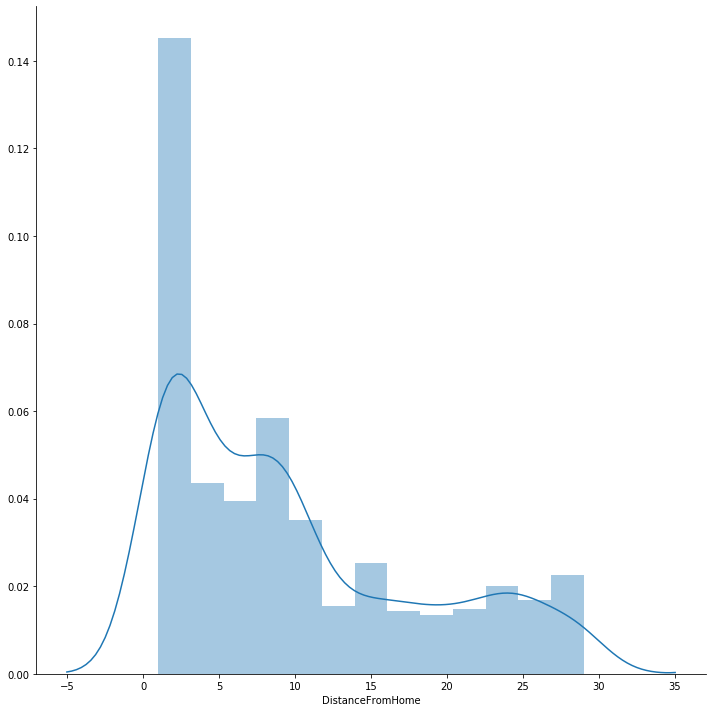

In [14]:
plot_distribution(numeric_data, numeric_predictors[1])

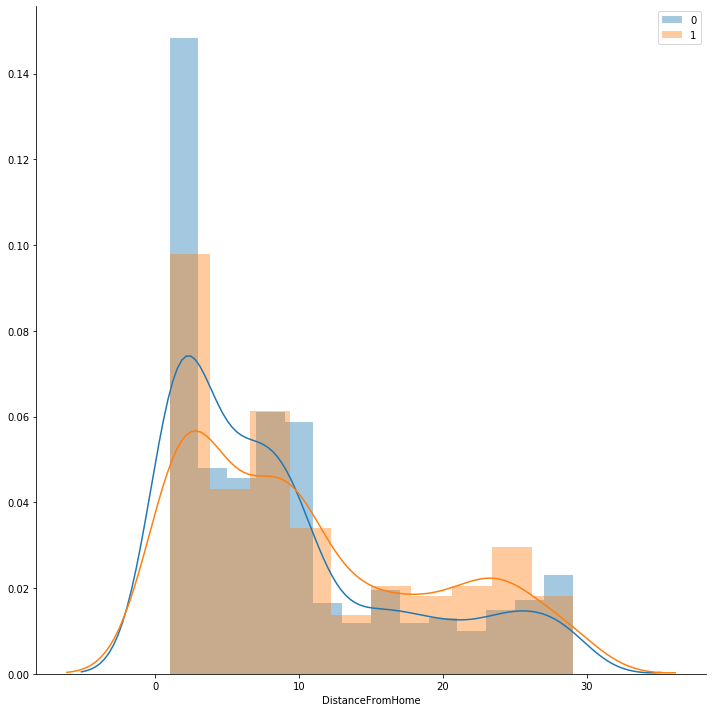

In [15]:
plot_distribution(numeric_data, numeric_predictors[1], with_hue = True)

This feature represents the distance of home of people from their offices, in kilometres/miles. As expected, lower values are more frequent.

It seems that a lower fraction of people who are extremely close to their offices have actually left their jobs. Although the relation is not that prominent, only one bar shows such a trend. There seems to be a bit stronger relation for long distances. We can see that a larger fraction of people, who live far from their office, have left their jobs.

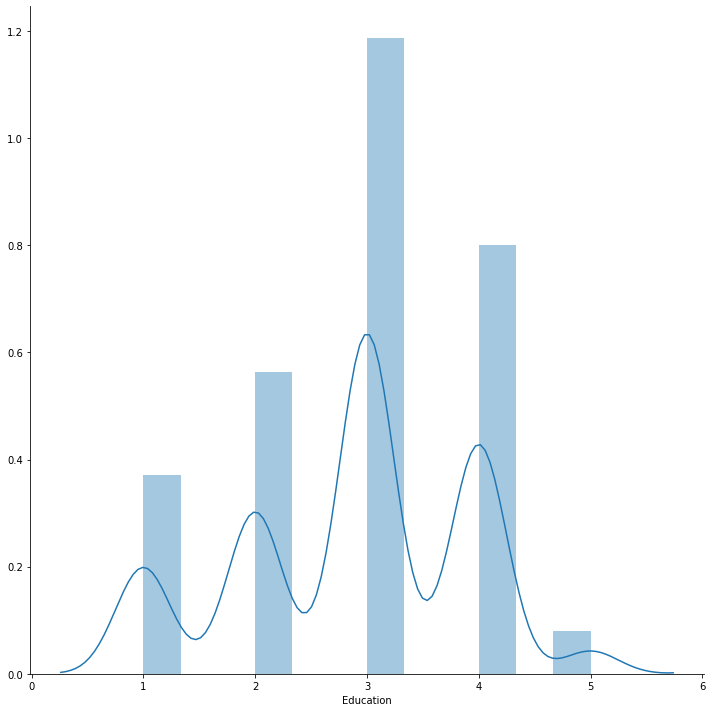

In [16]:
plot_distribution(numeric_data, numeric_predictors[2])

Education is a categorical variable. The numerical value represents the level of educational qualification a person.

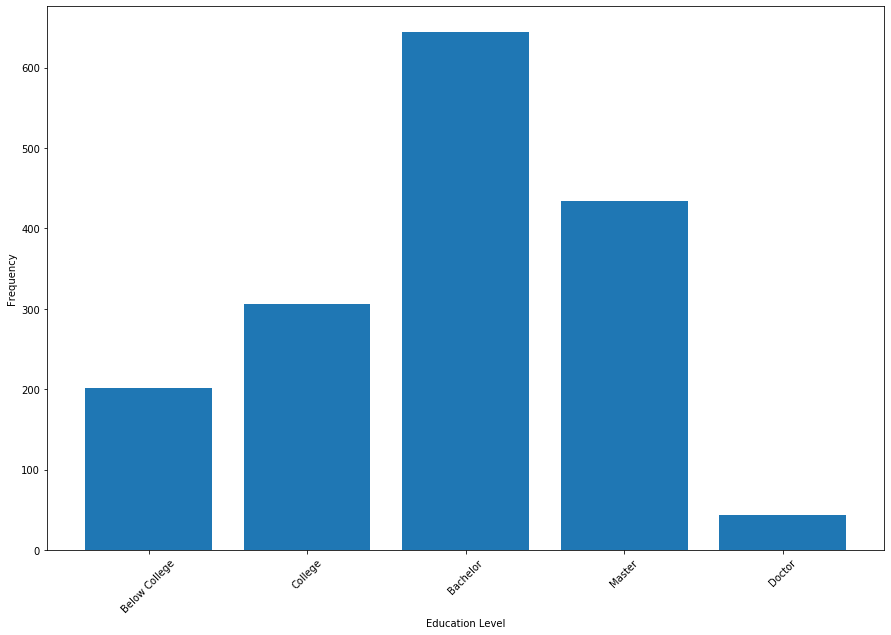

In [17]:
education_level = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_level_freq = dict(numeric_data[numeric_predictors[2]].value_counts())

plt.figure(figsize = (15, 10))
plt.bar(education_level_freq.keys(), education_level_freq.values())
plt.xticks(ticks = list(education_level.keys()), labels = list(education_level.values()), rotation = 45)
plt.xlabel('Education Level')
_ = plt.ylabel('Frequency')

Now we can see that most of the people are those who have earned a Bachelor's degree. A huge chunk of the population also belong to the Master's degree category. Very few Doctorates are employees at IBM. It is natural, such people usually tend to do research work and stay in colleges or research centres. Probably these few doctorates are in IBM for research work.

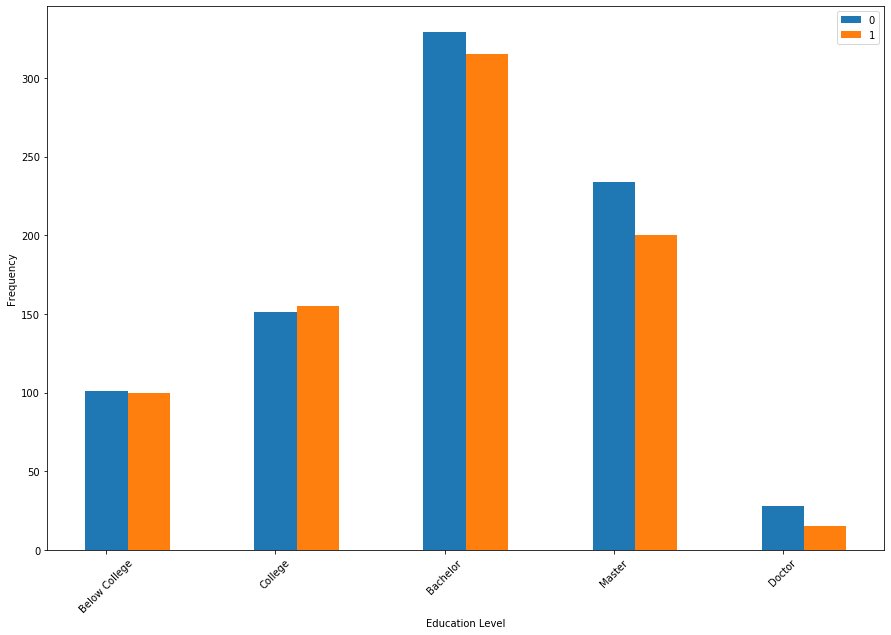

In [18]:
education_level_freq_stay = dict(numeric_data.loc[numeric_data['Attrition'] == 0, numeric_predictors[2]].value_counts())
education_level_freq_left = dict(numeric_data.loc[numeric_data['Attrition'] == 1, numeric_predictors[2]].value_counts())

plt.figure(figsize = (15, 10))
plt.bar(education_level_freq_stay.keys(), education_level_freq_stay.values(), width = 0.25, label = '0')
plt.bar(np.array(list(education_level_freq_left.keys())) + 0.25, education_level_freq_left.values(), width = 0.25, label = '1')
plt.xticks(ticks = list(education_level.keys()), labels = list(education_level.values()), rotation = 45)
plt.legend()
plt.xlabel('Education Level')
_ = plt.ylabel('Frequency')

There isn't much difference between the two bars for `Below College` and `College` categories. But for `Bachelor`, `Master` and `Doctor` categories, there is a noticeable difference. This especially true for `Masters` category.

I believe there might be two factors at play here - 
1. `Below College` and `College` qualified people might not be paid proportionately as their counter-parts in `Bachelor`, `Master` and `Doctor` categories.
2. They might have left the job in order to pursue higher studies. Again this might be an induced consequence of the first factor.

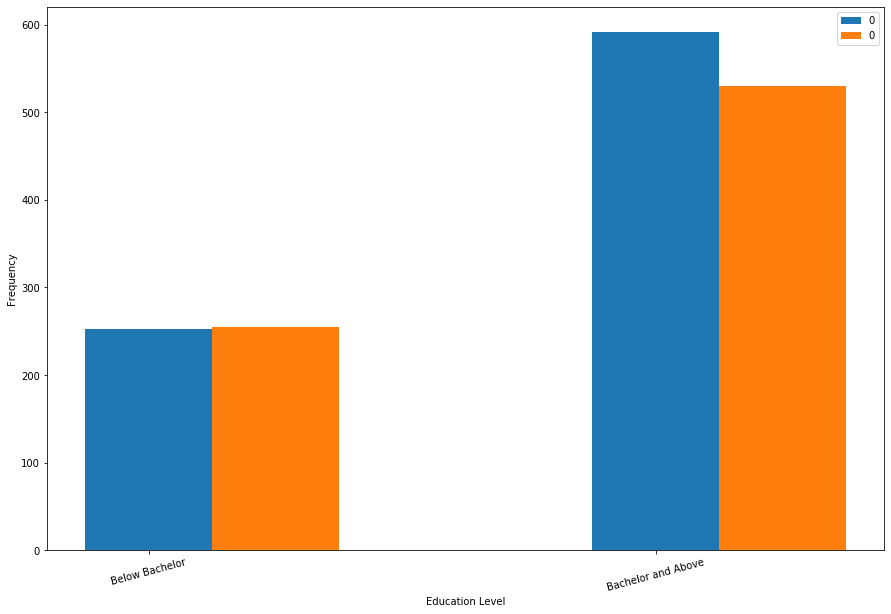

In [31]:
education_level_below_bachelor_stay = 0
education_level_above_bachelor_stay = 0
education_level_below_bachelor_left = 0
education_level_above_bachelor_left = 0

for level, num_people in education_level_freq_stay.items():
    if level == 1 or level == 2:
        education_level_below_bachelor_stay += num_people
    else:
        education_level_above_bachelor_stay += num_people

for level, num_people in education_level_freq_left.items():
    if level == 1 or level == 2: 
        education_level_below_bachelor_left += num_people
    else:
        education_level_above_bachelor_left += num_people


plt.figure(figsize = (15, 10))
plt.bar([1, 2], [education_level_below_bachelor_stay, education_level_above_bachelor_stay], width = 0.25, label = '0')
plt.bar([1.25, 2.25], [education_level_below_bachelor_left, education_level_above_bachelor_left], width = 0.25, label = '0')
plt.xticks(ticks = [1, 2], labels = ['Below Bachelor', 'Bachelor and Above'], rotation = 15)
plt.legend()
plt.xlabel('Education Level')
_ = plt.ylabel('Frequency')

The above plot also strengthens the hypothesis that employees who have a Bachelor's degree and/or above are less likely to leave the organization. May be you can club the 5 categories into 2, while keeping the discrimination similar.

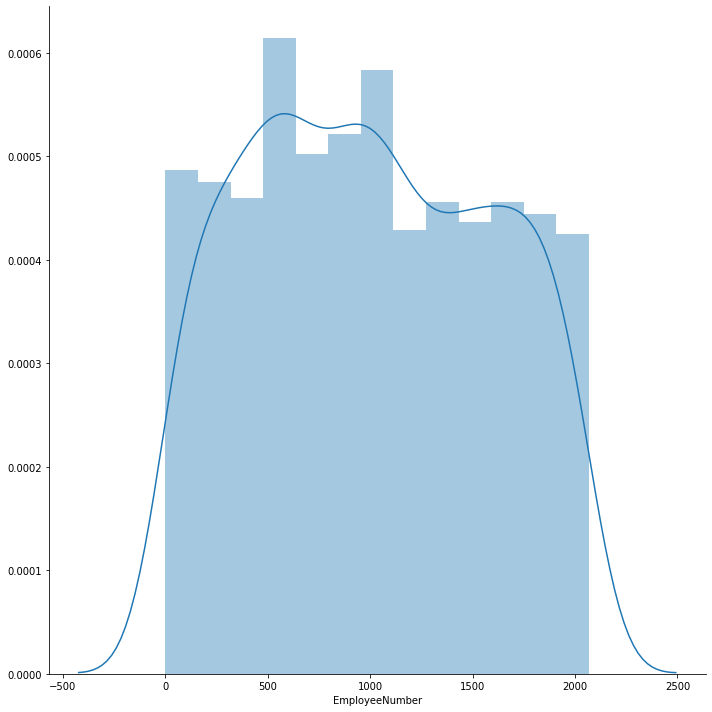

In [19]:
plot_distribution(numeric_data, numeric_predictors[3])

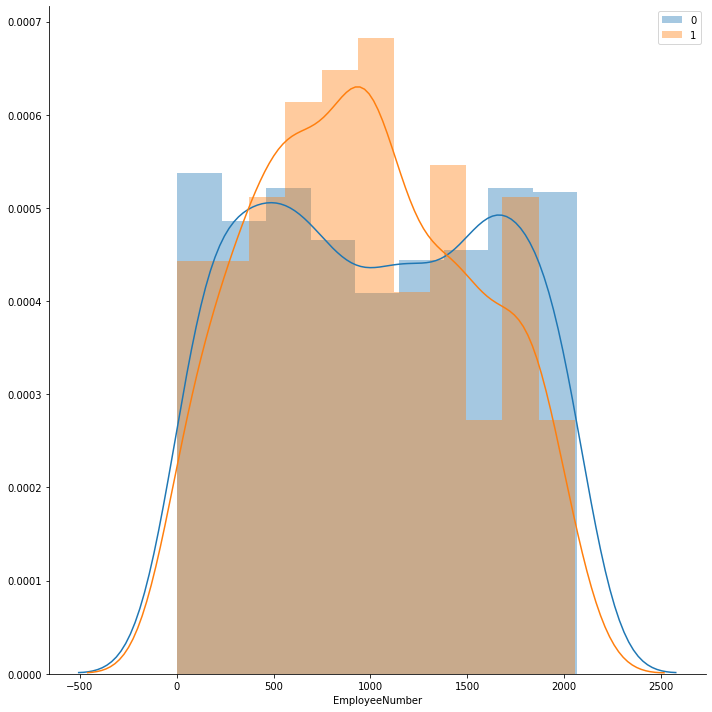

In [20]:
plot_distribution(numeric_data, numeric_predictors[3], with_hue = True)

Employee Number signifies the number of employees that are on the same level as the employee in context.

It can be seen that this number is almost constant for all the training samples - signifying that for the recorded employees, the number of equal ranked peers remain almost invariant.

The 2nd trend shows that the employees who had ~500-1100 equally ranked peers had a higher chance of leaving the company. This trend seems to change polarity as the value of the predictor increases.

However, from a pragmatic perspective, I don't believe the parameter to have much influence on an employee leaving. I am sure the trend seen here would turn out to be coincidental, and would be explained by some other paramter which is practically much more influential on someone leaving the job.

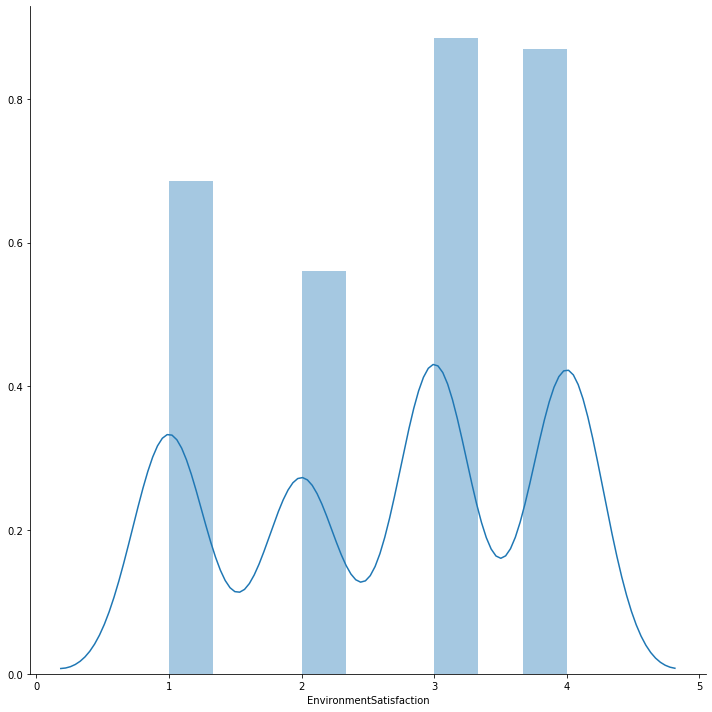

In [21]:
plot_distribution(numeric_data, numeric_predictors[4])

Environement Satisfaction seems to be another ordinal categorical variable. Let's examine this with bar plots.

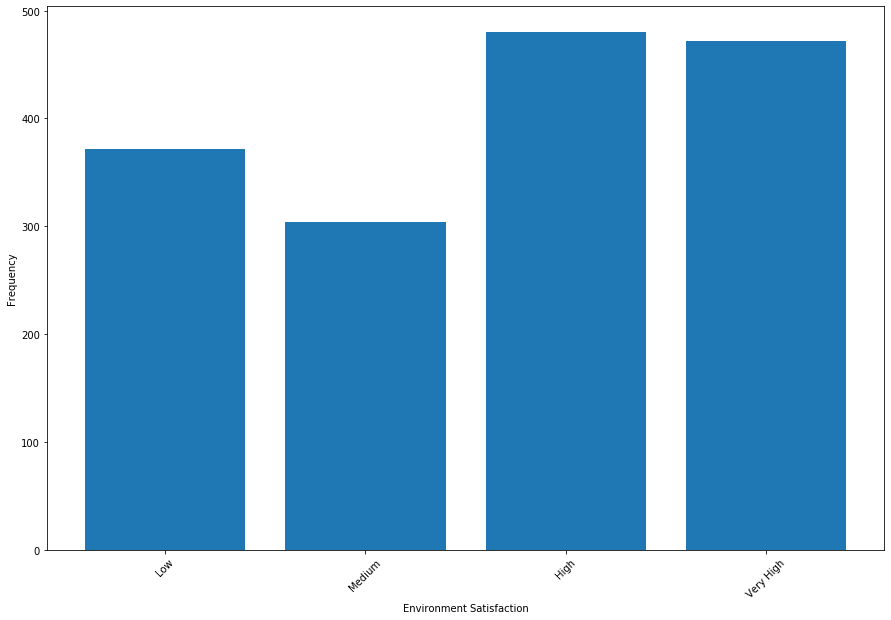

In [22]:
env_sat_mapper = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
env_sat_freq = dict(numeric_data[numeric_predictors[4]].value_counts())

plt.figure(figsize = (15, 10))
plt.bar(env_sat_freq.keys(), env_sat_freq.values())
plt.xticks(ticks = list(env_sat_mapper.keys()), labels = list(env_sat_mapper.values()), rotation = 45)
plt.xlabel('Environment Satisfaction')
_ = plt.ylabel('Frequency')

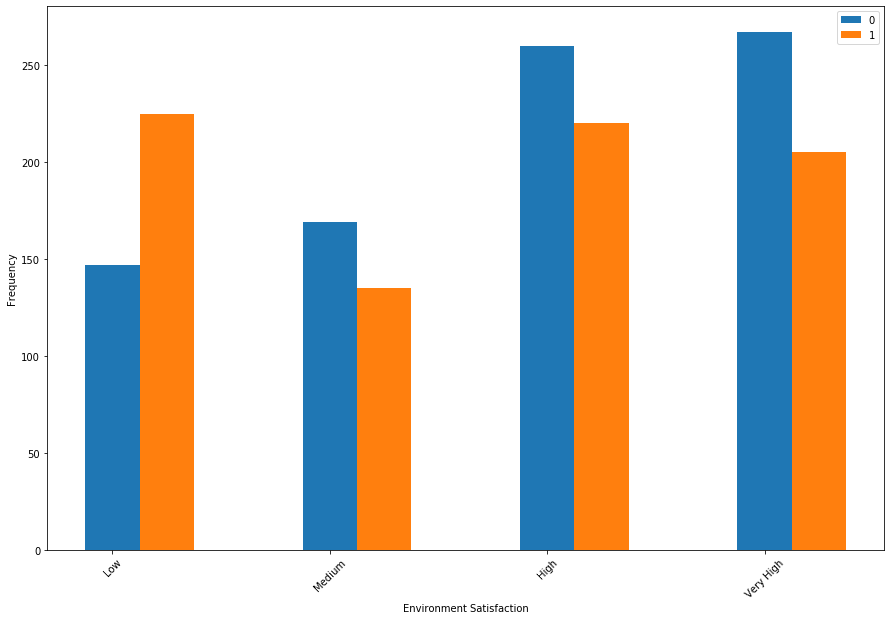

In [24]:
env_sat_freq_stay = dict(numeric_data.loc[numeric_data['Attrition'] == 0, numeric_predictors[4]].value_counts())
env_sat_freq_left = dict(numeric_data.loc[numeric_data['Attrition'] == 1, numeric_predictors[4]].value_counts())

plt.figure(figsize = (15, 10))
plt.bar(env_sat_freq_stay.keys(), env_sat_freq_stay.values(), width = 0.25, label = '0')
plt.bar(np.array(list(env_sat_freq_left.keys())) + 0.25, env_sat_freq_left.values(), width = 0.25, label = '1')
plt.xticks(ticks = list(env_sat_mapper.keys()), labels = list(env_sat_mapper.values()), rotation = 45)
plt.legend()
plt.xlabel('Environment Satisfaction')
_ = plt.ylabel('Frequency')

In [ ]:


# plt.figure(figsize = (15, 10))
# plt.bar(env_sat_freq_stay.keys(), env_sat_freq_stay.values(), width = 0.25, label = '0')
# plt.bar(np.array(list(env_sat_freq_left.keys())) + 0.25, env_sat_freq_left.values(), width = 0.25, label = '1')
# plt.xticks(ticks = list(env_sat_mapper.keys()), labels = list(env_sat_mapper.values()), rotation = 45)
# plt.legend()
# plt.xlabel('Environment Satisfaction')
# _ = plt.ylabel('Frequency')